In [1]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\lasra\Downloads\PCOPPUSDM.csv",index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

403
            CopperPriceUSD
DATE                      
1990-01-01     2365.556991
1990-02-01     2358.943400
1990-03-01     2625.702723
1990-04-01     2685.226891
1990-05-01     2740.342391


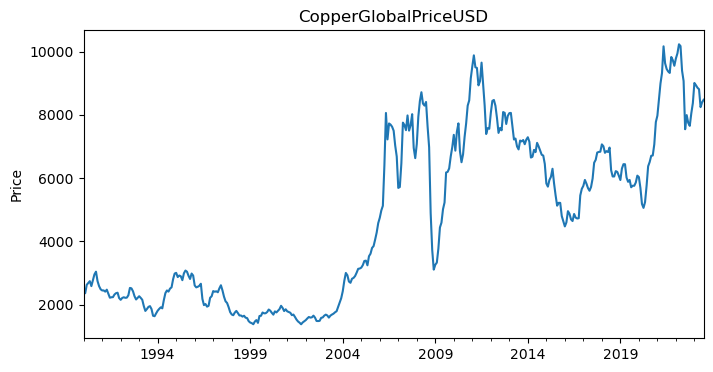

In [4]:
title='CopperGlobalPriceUSD'
ylabel='Price'
xlabel='' # we don't really need a label here

ax = df['CopperPriceUSD'].plot(figsize=(8,4),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

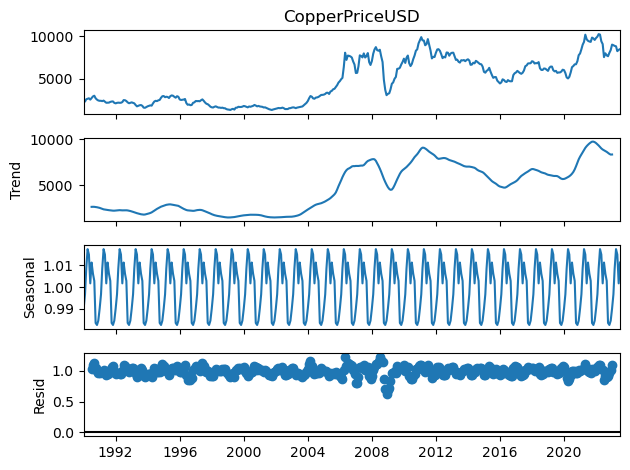

In [6]:
result = seasonal_decompose(df['CopperPriceUSD'], model='mul')
result.plot();

In [7]:
auto_arima(df['CopperPriceUSD'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  403
Model:             SARIMAX(4, 1, 1)x(2, 0, 1, 12)   Log Likelihood               -2873.024
Date:                            Thu, 31 Aug 2023   AIC                           5764.048
Time:                                    16:52:28   BIC                           5800.016
Sample:                                01-01-1990   HQIC                          5778.289
                                     - 07-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5825      0.076     -7.653      0.000      -0.732      -0.433
ar.L2          0.3262      0.036      8.994      0.000       0.255       0.397
ar.L3          0.0306      0.042      0.729      0.466      -0.052       0.113
ar.L4         -0.1271      0.046     -2.780      0.005      -0.217      -0.037
ma.L1          0.9024      0.072     12.505      0.000       0.761       1.044
ar.S.L12      -0.5345      0.215     -2.481      0.013      -0.957      -0.112
ar.S.L24      -0.1222      0.057     -2.157      0.031      -0.233      -0.011
ma.S.L12       0.5613      0.216      2.597      0.009       0.138       0.985
sigma2      9.413e+04   3655.797     25.747      0.000     8.7e+04    1.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               684.83
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               6.24   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [9]:
model = SARIMAX(train['CopperPriceUSD'],order=(4,1,1),seasonal_order=(2,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     CopperPriceUSD   No. Observations:                  391
Model:             SARIMAX(4, 1, 1)x(2, 0, 1, 12)   Log Likelihood               -2783.754
Date:                            Thu, 31 Aug 2023   AIC                           5585.508
Time:                                    16:55:28   BIC                           5621.203
Sample:                                01-01-1990   HQIC                          5599.658
                                     - 07-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5491      0.070     -7.883      0.000      -0.686      -0.413
ar.L2          0.3383      0.037      9.169      0.000       0.266       0.411
ar.L3          0.0240      0.041      0.586      0.558      -0.056       0.104
ar.L4         -0.1202      0.047     -2.567      0.010      -0.212      -0.028
ma.L1          0.9118      0.063     14.506      0.000       0.789       1.035
ar.S.L12      -0.5134      0.242     -2.121      0.034      -0.988      -0.039
ar.S.L24      -0.1181      0.057     -2.090      0.037      -0.229      -0.007
ma.S.L12       0.5328      0.243      2.194      0.028       0.057       1.009
sigma2      9.245e+04   3632.501     25.450      0.000    8.53e+04    9.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               717.06
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               5.63   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(4,1,1)(2,0,1,12) Predictions')

In [11]:
predictions

2022-08-01    7043.159431
2022-09-01    6874.897779
2022-10-01    6792.426732
2022-11-01    6907.873386
2022-12-01    6765.358706
2023-01-01    6857.928551
2023-02-01    6691.580714
2023-03-01    6640.753826
2023-04-01    6549.722640
2023-05-01    6478.097608
2023-06-01    6564.826254
2023-07-01    6596.049515
Freq: MS, Name: SARIMAX(4,1,1)(2,0,1,12) Predictions, dtype: float64

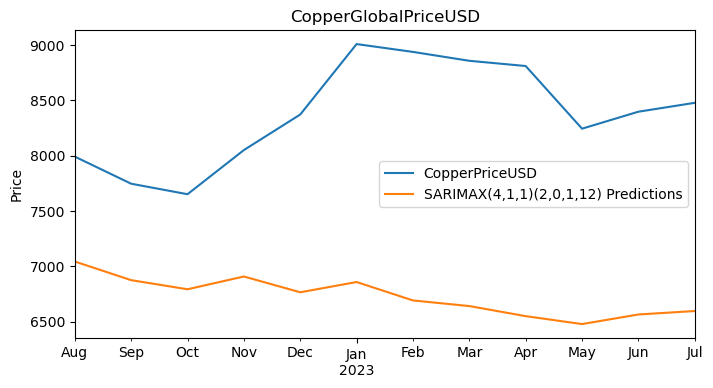

In [15]:
title='CopperGlobalPriceUSD'
ylabel='Price'
xlabel=''

ax = test['CopperPriceUSD'].plot(legend=True,figsize=(8,4),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [16]:
error1 = mean_squared_error(test['CopperPriceUSD'], predictions)
error2 = rmse(test['CopperPriceUSD'], predictions)
print(f'SARIMAX(4,1,1)(2,0,1,12) MSE Error: {error1:11.10}')
print(f'SARIMAX(4,1,1)(2,0,1,12) RMSE Error: {error2:11.10}')

SARIMAX(4,1,1)(2,0,1,12) MSE Error:  2996480.87
SARIMAX(4,1,1)(2,0,1,12) RMSE Error: 1731.034624


In [17]:
model = SARIMAX(df['CopperPriceUSD'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMAX(4,1,1)(2,0,1,12) Forecast')

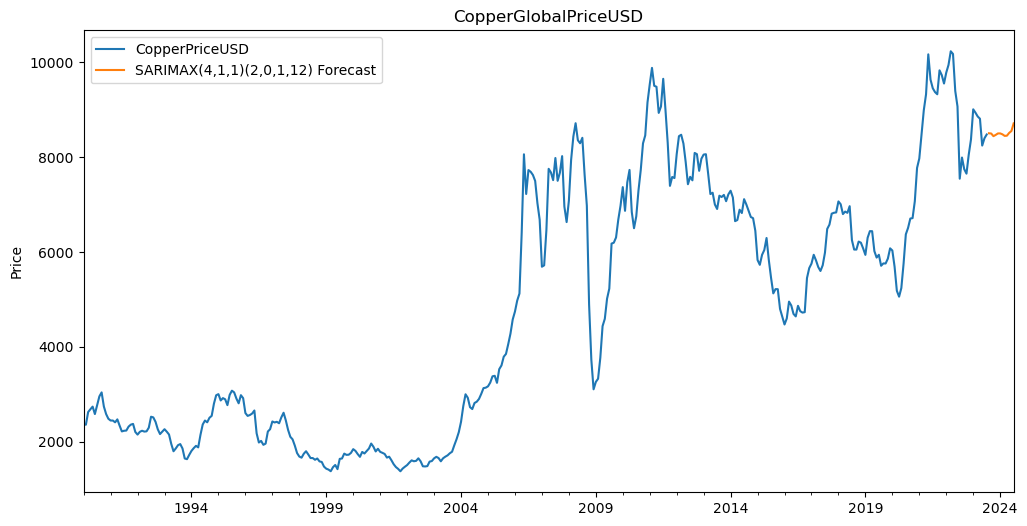

In [23]:
title='CopperGlobalPriceUSD'
ylabel='Price'
xlabel=''

ax = df['CopperPriceUSD'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);